# Problem set 1: Solving the consumer problem

In this first problem set, we will take a look at solving the canonical utility maximization problem for the consumer.  

**Problem set structure:** 
* Each problem set consists of tasks and problems. _Tasks_ train you in using specific techniques, while _problems_ train you in solving actual economic problems. 
* Each problem set also contains solutions, which can be found in separate Python files.
* The Python files `A[..].py` do not run out of the box. But you can copy the code into your notebook or user module. 
* *You should really try to solve the tasks and problems on your own before looking at the answers!* 
* You goal should, however, not be to write everything from scratch. 
* Finding similar code from the lectures and adjusting it is completely ok. I rarely begin  completely from scratch, I figure out when I last did something similar and copy in the code to begin with. A quick peak at the solution, and then trying to write the solution yourself is also a very beneficial approach.

**Multiple solutions:** Within the field of numerical analysis there is often many more than one way of solving a specific problem. So the solution provided is just one example. If you get the same result, but use another approach, that might be just as good (or even better).

**Extra problems:** Solutions to the extra problems are not provided, but we encourage you to take a look at them if you have the time.

# Tasks

## functions

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

In [25]:
# write your own code here
def u(x1, x2, alpha=0.5, beta=2):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

**Answer:** see A1.py

## print

In [26]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [27]:
def print_table(x1_vec,x2_vec):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'       ## Note the use of f-strings to make the numbers look nice.
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i,x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, x2 in enumerate(x2_vec):
            text += f'{u(x1,x2):6.3f}'  ## This function uses the function u, which is in the global scope. This is generally
                                        ## bad practice - can you think of a way to avoid that?
    
    # d. print
    print(text)

print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0  1.050 1.155 1.351 1.369 1.406
  1  1.155 1.300 1.601 1.631 1.695
  2  1.351 1.601 2.300 2.394 2.612
  3  1.369 1.631 2.394 2.500 2.752
  4  1.406 1.695 2.612 2.752 3.100


In [28]:
def print_table_alt(x1_vec,x2_vec, ufunc): ## now we can instead pass the function a utility function to use...
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i, x1 in enumerate(x1_vec):
      text += f'{i:6d}'
      for j,x2 in enumerate(x2_vec):
         text += f'{ufunc(x1, x2):6.3f}' ## ...and use the local scope ufunc instead! Much nicer and less prone to scope bugs.
      text += f'\n'
    
    # d. print
    print(text) 


In [29]:
print_table_alt(x1_vec, x2_vec, u) ## remember to include the u function as an argumetnt.

        0     1     2     3     4
     0 1.050 1.155 1.351 1.369 1.406
     1 1.155 1.300 1.601 1.631 1.695
     2 1.351 1.601 2.300 2.394 2.612
     3 1.369 1.631 2.394 2.500 2.752
     4 1.406 1.695 2.612 2.752 3.100



**Answer:** see A2.py

## matplotlib

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [30]:
# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#plt.style.use('seaborn-whitegrid')  ## this seems to be outdated? try to print(plt.style.available) to see which styles you can se instead
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

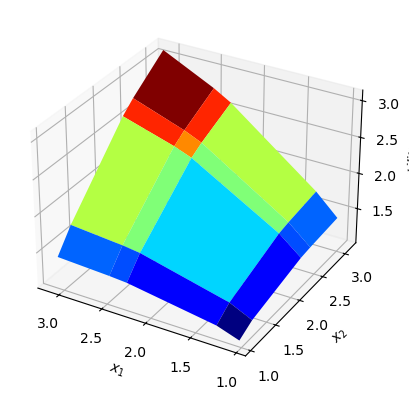

In [31]:
# evaluate utility function
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij') ## don't forget the indexing='ij' argument, otherwise the grids will be in the wrong order
u_grid = u(x1_grid,x2_grid)

# write your code here
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid, x2_grid, u_grid, cmap=cm.jet)
ax.invert_xaxis()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')      ## by putting the text in $$ we can write latex code
ax.set_zlabel('$utility$');

**Answer:** see A3.py

## optimize

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Solve this problem and illustrate your results.

Grid search: $x^* = -1.52$, $f(x^*) = -0.88
Solver:       $x^* = -1.43$, $f(x^*) = -0.89


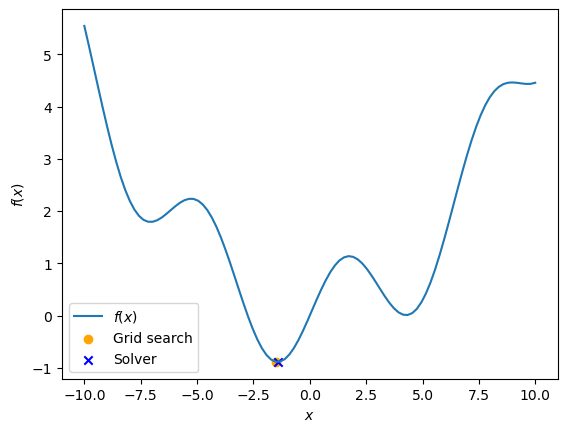

In [32]:
# update this code
import numpy as np

# a. define function
def f(x):
    return np.sin(x) + 0.05*x**2

# b. solution using a loop
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number

for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    if f_now < f_best:
        f_best = f_now
        x_best = x

# c. solution using scipy optmize
from scipy import optimize
x_guess = [0]      
obj = lambda x: f(x[0])
res = optimize.minimize(obj, x0=x_guess)
x_best_scipy = res.x[0]
f_best_scipy = res.fun

# d. print
# missing lines
print(f'Grid search: $x^* = {x_best:5.2f}$, $f(x^*) = {f_best:5.2f}')
print(f'Solver:       $x^* = {x_best_scipy:5.2f}$, $f(x^*) = {f_best_scipy:5.2f}')

# e. figure
# missing lines
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x_vec, f_vec, label='$f(x)$')
ax.scatter(x_best, f_best, label='Grid search', color='orange')
ax.scatter(x_best_scipy, f_best_scipy, label='Solver', color='blue', marker='x')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
ax.legend()

## Feel free to play around with the parameters a bit.
## What happens if we change the number of grid points?
## What happens if we change the initial guess of the solver to for instance 5?

**Answer:** see A4.py

# Problem

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

You can use the following functions:

In [33]:
def utility_function(x,alpha):
    # ensure you understand what this function is doing

    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now
    return u
    
def expenditures(x,p):
    # ensure you understand what this function is doing

    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def print_solution(x,alpha,I,p):
    # you can just use this function
    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

You can initially use the following parameter choices:

In [34]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

Solving with a loop:

In [35]:
# update this code
N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector between 0 and 1
x_max = I/p # maximum x so E = I

u_best = -np.inf # minus infinity
x = np.nan

# missing lines
for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    E = expenditures(x,p)
                    if E <= I:
                        u_now = utility_function(x,alpha)
                        if u_now > u_best:
                            u_best = u_now
                            x_best = x

print_solution(x_best,alpha,I,p)
## This gives us a solution, but it takes a LONG time to evaluate 15**5 grid points!
## And it seems that the expenditure shares are a bit different from what we would expect from theory...

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


> **Extra:** The above code can be written nicer with the ``product`` function from ``itertools``.

In [36]:
import itertools as it

for x in it.product(fac, repeat=5):
     x *= x_max
     E = expenditures(x,p)
     if E <= I:
         u_now = utility_function(x,alpha)
         # misssing lines
         if u_now > u_best:
            u_best = u_now
            x_best = x
    
print_solution(x_best,alpha,I,p)

## This code is a bit neater, but still slow and the expenditure shares are still off...

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


Solving with a numerical optimizer:

In [37]:
# update this code
from scipy import optimize

# a. contraint function (negative if violated)
constraints = ({'type':'ineq', 'fun': lambda x: I - expenditures(x, p)})
bounds = [(0, I/p_now) for p_now in p]

# b. call optimizer
initial_guess = (I/p)/6 # some guess, should be feasible
obj = lambda x: -utility_function(x, alpha=alpha)
res = optimize.minimize(obj, x0=initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

print(res.message) # check that the solver has terminated correctly

# c. print result
print_solution(res.x, alpha, I, p)

## Much faster, and the expenditure shares are in line with theory.
## Think about how the two methods can be combined to eg. deal with local minima.

Optimization terminated successfully
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


## Solutions using loops

Using **raw loops**:

See A5.py

Using **smart itertools loop:**

see A6.py    

## Solutions using solvers

In [38]:
from scipy import optimize

Solution using a **constrained optimizer:**

see A7.py

Solution using an **unconstrained optimizer:**

see A8.py

# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility $u_0$, and price-vector $p=(p_1,p_2)$,

$$
\begin{aligned}
E(p_{1},p_{2},u_0) & = \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq u_0 \\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

In [39]:
# Define a function computing the cost minimizing x as a function of utility
def minimize_costs(utility, alpha, p):
    # objective function, bounds and constraints
    obj = lambda x: expenditures(x, p)
    constraints = {'type':'ineq', 'fun': lambda x: utility_function(x, alpha=alpha)-utility}
    bounds = [(0, np.infty), (0, np.infty)]

    # optimization
    initial_guess = 4*np.ones(2) # (2,) vector with 4 consumption of both goods
    res = optimize.minimize(obj, x0=initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

    # verify that optimization was succesful
    assert res.success == True
    return res.x

## We can also define a function for the budget constraint
def budget_constraint(x1, p, I):
    p1, p2 = p # Unpack prices
    x2 = (I-p1*x1)/p2
    return x2

## And for the indifference curve 
## I use a root finder to allow for an arbitrary utility function. - that is, i solve the problem utility(x)=u
## Alternatively, just isolate x2 in the CD utility function
def indifference(x1, ufunc, utility):
    obj = lambda x2: ufunc(np.array([x1, x2])) - utility 
    res = optimize.root_scalar(obj, x0=10e-6, x1=x1) ## first guess no consumption of x2, then guess x2=x1 and update 
    assert res.converged == True
    return res.root


Text(0, 0.5, '$x_2$')

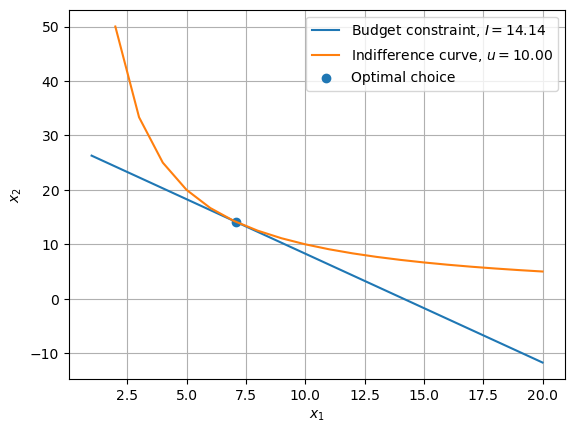

In [41]:
p = np.array([1,0.5]) #set price vector
alpha = np.array([0.5, 0.5])
x1_grid = np.linspace(1, 20, 20)
utility = 10

# plot of indifference curves
u_obj = lambda x: utility_function(x, alpha) ## utility function to pass to root finder
indif_curve = np.array([indifference(x1, u_obj, utility) for x1 in x1_grid])

# Cost minimizing bundle
x_opt = minimize_costs(utility, alpha, p)

# Expediture for cost minimizing bundle
exp_opt = expenditures(x_opt, p)

#  Budget constraint for said expenditue
budget = budget_constraint(x1_grid, p, exp_opt)

# Plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(x1_grid, budget, label=f'Budget constraint, $I = {exp_opt:6.2f}$')
ax.plot(x1_grid[1:], indif_curve[1:], label=f'Indifference curve, $u = {utility:6.2f}$') # first value is left out bc it steals the y-axis
ax.scatter(x_opt[0], x_opt[1], label=f'Optimal choice')
ax.grid(True)
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3. 

In [47]:
from types import SimpleNamespace
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

class CostMinimization():
    def __init__(self):
        ## Upon initiation, two namespaces are created to contain parameters and solution
        # parameters
        self.par = SimpleNamespace()
        self.par.alpha = np.array([0.3, 0.7]) # Cobb-Douglas parameters
        self.par.p = np.array([1,1]) # prices
        self.par.utility = 10 # utility
        self.par.N_grid = 50 # number of grid points
        self.par.x1_grid = np.linspace(1, 30, self.par.N_grid)

        ## solution - for now the arrays are empty, but they will eventually contain the solution
        self.sol = SimpleNamespace()
        self.sol.x = np.zeros(2) + np.nan # 
        self.sol.budget_constraint = np.zeros(self.par.N_grid) + np.nan
        self.sol.indifference_curve = np.zeros(self.par.N_grid) + np.nan
        self.sol.exp_opt = np.nan

    def expenditures(self, x):
        return self.par.p@x ## Note use of matrix product to compute expenditure

    def utility_function(self, x):
        alpha = self.par.alpha
        return x[0]**alpha[0]*x[1]**alpha[1]

    def budget_constraint(self, I):
        p1, p2 = self.par.p 
        x1 = self.par.x1_grid
        x2 = (I-p1*x1)/p2
        x2[x2<0] =  np.nan ## this sets negative values of x2 to missing to keep the plot nice
        return x2

    def indifference_curve(self, x1):
        u = self.par.utility
        alpha = self.par.alpha
        return (u/(x1**alpha[0]))**(1/alpha[1])

    def solve(self):
        ## objective function, bounds and constraints
        obj = lambda x: self.expenditures(x)
        constraints = {'type':'ineq', 'fun': lambda x: self.utility_function(x)-self.par.utility}
        bounds = [(0, np.infty), (0, np.infty)]

        ## optimization
        initial_guess = np.ones(2)*self.par.utility/2 ## guess on equal consumption of both
        res = optimize.minimize(obj, x0=initial_guess, bounds=bounds, constraints=constraints, method='SLSQP')

        ## verify that optimization was succesful
        assert res.success == True
        
        ## store solution in namespace - then we can access it from the global scope
        self.sol.x = res.x
        self.sol.indifference_curve = self.indifference_curve(self.par.x1_grid)
        self.sol.exp_opt = self.expenditures(self.sol.x)
        self.sol.budget_constraint = self.budget_constraint(self.sol.exp_opt)

    
    def plot_solution(self, ax):
        
        ## check that we know the solution
        if np.any(np.isnan(self.sol.x)):
            print('Model not solved')
        else:
            ax.plot(self.par.x1_grid, self.sol.budget_constraint,
                        label=f'Budget constraint, $I = {self.sol.exp_opt:6.2f}$')
            ax.plot(self.par.x1_grid[1:], self.sol.indifference_curve[1:], 
                        label=f'Indifference curve, $u = {self.par.utility:6.2f}$') 
            ax.scatter(self.sol.x[0], self.sol.x[1], 
                        label=f'Optimal choice, $x=({self.sol.x[0]:6.2f}, {self.sol.x[1]:6.2f})$')
            ax.legend()
            ax.grid(True)
            ax.set_xlabel('$x_1$')
            ax.set_ylabel('$x_2$')


In [48]:
# Solve and print solution
model = CostMinimization()
model.solve()

In [49]:
# Alternative prices
model_alt = CostMinimization()
model_alt.par.p = np.array([2,1])
model_alt.solve()

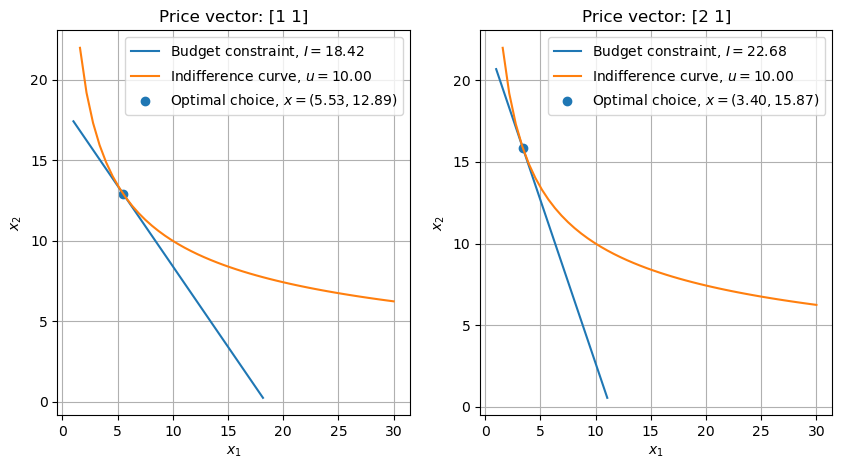

In [50]:
# plot solutions
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(1,2,1)
model.plot_solution(ax1)
ax1.set_title(f'Price vector: {model.par.p}')

ax2 = fig.add_subplot(1,2,2)
model_alt.plot_solution(ax2)
ax2.set_title(f'Price vector: {model_alt.par.p}');